# HOTEL BOOKING

### Research Questions

1. How many bookings were canceled?
2. Where are guests mostly coming from?
3. What months are mostly busy?
4. Which month have the highest number of cancelations?
5. Bookings by market segment?
6. How long do guests stay at the hotels?
7. How much do guests pay a room per night?
8. How does the price vary per night over the year?




In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
from pathlib import Path as Path

In [3]:
#loading the dataset
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# check null 
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.loc[df.children.isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [9]:
null_replacement = { 'children': 0 , 'country': 'Unknown', 'agent': 0, 'company': 0 }
df = df.fillna(null_replacement)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [12]:
df['meal'] = df['meal'].str.replace('Undefined','SC')

In [13]:
no_guests = (df.adults == 0) & (df.children == 0) & (df.babies == 0)
df.loc[no_guests]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [14]:
df.drop(df.index[no_guests], inplace=True)

In [15]:
df.shape

(119210, 32)

In [16]:
df['hotel'].value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

# EDA

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [18]:
df_conn = sqlite3.connect('hotel_booking.db')
df_cursor = df_conn.cursor()

In [19]:
df.to_sql('hotel_booking', df_conn, if_exists='replace', index=False)

In [20]:
df_init_query = pd.read_sql(''' SELECT * FROM hotel_booking ''', df_conn)
df_init_query.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


**1. How many bookings were canceled?**

In [21]:
total_cancel= pd.read_sql('''SELECT hotel, COUNT(hotel) AS total_cancel
                             FROM hotel_booking
                             WHERE is_canceled = 1
                             GROUP BY hotel''', df_conn)
                              
total_cancel

,hotel,total_cancel
0,City Hotel,33079
1,Resort Hotel,11120


<AxesSubplot:xlabel='hotel', ylabel='total_cancel'>

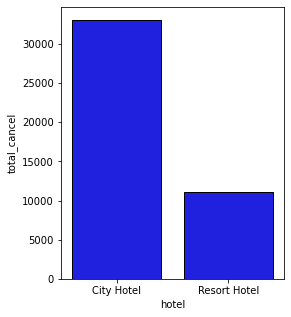

In [61]:
fig, ax = plt.subplots(figsize=(4, 5))
sns.barplot(x = 'hotel', y = 'total_cancel', data = total_cancel, color = 'blue', edgecolor='black')

**2. Where are guests mostly coming from?**

In [23]:
#identify non cancel booking
actual_booking = pd.read_sql(''' SELECT *
                                 FROM hotel_booking
                                 WHERE is_canceled = 0''', df_conn)
actual_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [57]:
total_booking_per_country= pd.read_sql('''SELECT country, 
                                            COUNT(CASE WHEN hotel = 'Resort Hotel' THEN hotel END) AS total_booking_resort,
                                            COUNT(CASE WHEN hotel = 'City Hotel' THEN hotel END) AS total_booking_city, COUNT(*) AS all_bookings
                                          FROM hotel_booking
                                          WHERE is_canceled = 0
                                          GROUP BY country
                                          ORDER BY all_bookings DESC
                                          LIMIT 10''', df_conn)
                              
total_booking_per_country

,country,total_booking_resort,total_booking_city,all_bookings
0,PRT,10184,10793,20977
1,GBR,5922,3746,9668
2,FRA,1399,7069,8468
3,ESP,3105,3278,6383
4,DEU,1057,5010,6067
5,IRL,1734,808,2542
6,ITA,379,2049,2428
7,BEL,389,1479,1868
8,NLD,458,1258,1716
9,USA,407,1185,1592


<AxesSubplot:xlabel='all_bookings', ylabel='country'>

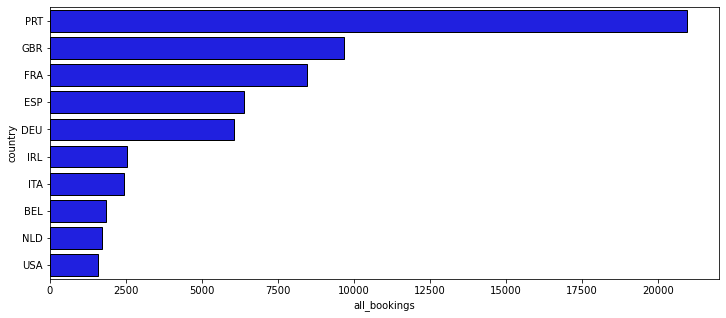

In [58]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x = 'all_bookings', y = 'country', data = total_booking_per_country, color = 'blue', edgecolor='black')

- Mostly, hotel guests came from Portugal (20,977), United of Kingdom (9,668), and France (8,468) 

**3. What months are mostly busy?**

In [51]:
total_booking_per_month= pd.read_sql('''SELECT arrival_date_month, 
                                            COUNT(CASE WHEN hotel = 'Resort Hotel' THEN hotel END) AS total_booking_resort
                                            ,COUNT(CASE WHEN hotel = 'City Hotel' THEN hotel END) AS total_booking_city
                                            ,COUNT(*) AS total_booking_per_month
                                        FROM hotel_booking
                                        WHERE is_canceled = 0
                                        GROUP BY arrival_date_month
                                        ORDER BY CAST(strftime('%m', reservation_status_date)AS INTEGER)''', df_conn)
                              
total_booking_per_month

,arrival_date_month,total_booking_resort,total_booking_city,total_booking_per_month
0,January,1866,2249,4115
1,February,2308,3051,5359
2,March,2571,4049,6620
3,April,2550,4010,6560
4,May,2535,4568,7103
5,June,2037,4358,6395
6,July,3137,4770,7907
7,August,3257,5367,8624
8,September,2102,4283,6385
9,October,2575,4326,6901


In [52]:
total_booking_per_month_inorder= pd.read_sql('''SELECT arrival_date_month, 
                                            COUNT(CASE WHEN hotel = 'Resort Hotel' THEN hotel END) AS total_booking_resort
                                            ,COUNT(CASE WHEN hotel = 'City Hotel' THEN hotel END) AS total_booking_city
                                            ,COUNT(*) AS total_booking_per_month
                                        FROM hotel_booking
                                        WHERE is_canceled = 0
                                        GROUP BY arrival_date_month
                                        ORDER BY total_booking_per_month DESC
                                        LIMIT 5''', df_conn)
                              
total_booking_per_month_inorder

,arrival_date_month,total_booking_resort,total_booking_city,total_booking_per_month
0,August,3257,5367,8624
1,July,3137,4770,7907
2,May,2535,4568,7103
3,October,2575,4326,6901
4,March,2571,4049,6620


<AxesSubplot:xlabel='arrival_date_month', ylabel='total_booking_per_month'>

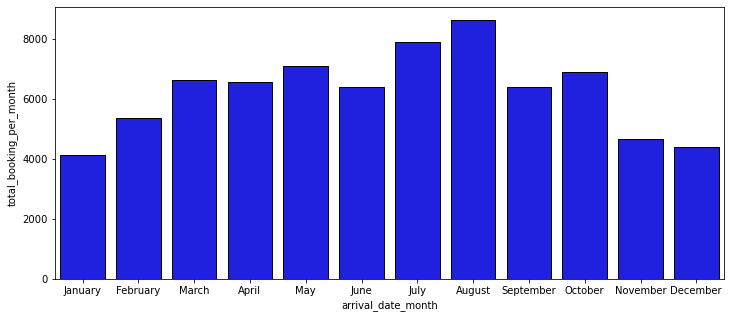

In [56]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x = 'arrival_date_month', y = 'total_booking_per_month', data = total_booking_per_month, color = 'blue', edgecolor='black')

<AxesSubplot:xlabel='arrival_date_month', ylabel='total_booking_per_month'>

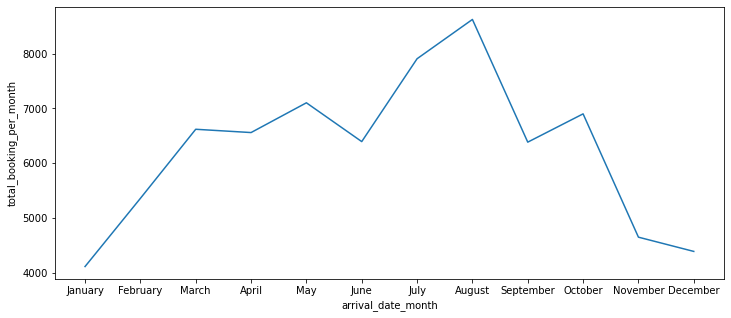

In [55]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=total_booking_per_month, x='arrival_date_month', y='total_booking_per_month', ax=ax)

**4. Which month have the highest number of cancelations?**

In [29]:
total_cancel_per_month= pd.read_sql('''SELECT arrival_date_month, 
                                            COUNT(CASE WHEN hotel = 'Resort Hotel' THEN hotel END) AS total_cancel_resort
                                            ,COUNT(CASE WHEN hotel = 'City Hotel' THEN hotel END) AS total_cancel_city
                                            ,COUNT(*) AS total_cancel_per_month
                                        FROM hotel_booking
                                        WHERE is_canceled = 1
                                        GROUP BY arrival_date_month
                                        ORDER BY total_cancel_per_month DESC''', df_conn)
                              
total_cancel_per_month

,arrival_date_month,total_cancel_resort,total_cancel_city,total_cancel_per_month
0,August,1637,3600,5237
1,July,1436,3301,4737
2,May,1024,3653,4677
3,June,1007,3527,4534
4,April,1059,3459,4518
5,October,978,3268,4246
6,September,1006,3109,4115
7,March,763,2385,3148
8,February,794,1899,2693
9,December,631,1737,2368


<AxesSubplot:xlabel='arrival_date_month', ylabel='total_cancel_per_month'>

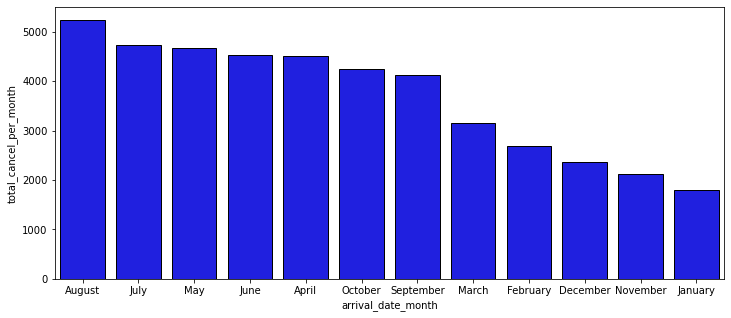

In [62]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x = 'arrival_date_month', y = 'total_cancel_per_month', data = total_cancel_per_month, color = 'blue', edgecolor='black')

- August

**6. Bookings by market segment**

In [30]:
booking_per_market_segment= pd.read_sql('''SELECT market_segment, 
                                            COUNT(CASE WHEN hotel = 'Resort Hotel' THEN hotel END) AS total_cancel_resort
                                            ,COUNT(CASE WHEN hotel = 'City Hotel' THEN hotel END) AS total_cancel_city
                                            ,COUNT(*) AS market_segment_count
                                            FROM hotel_booking
                                            WHERE is_canceled = 0
                                            GROUP BY market_segment
                                            ORDER BY market_segment_count DESC''', df_conn)
                              
booking_per_market_segment

,market_segment,total_cancel_resort,total_cancel_city,market_segment_count
0,Online TA,11481,24192,35673
1,Offline TA/TO,6334,9546,15880
2,Direct,5632,5016,10648
3,Groups,3358,4339,7697
4,Corporate,1954,2337,4291
5,Complementary,168,471,639
6,Aviation,0,183,183


In [31]:
labels=list(booking_per_market_segment.market_segment.values)
labels

['Online TA',
 'Offline TA/TO',
 'Direct',
 'Groups',
 'Corporate',
 'Complementary',
 'Aviation']

In [32]:
sizes = list(booking_per_market_segment.market_segment_count.values)
sizes

[35673, 15880, 10648, 7697, 4291, 639, 183]

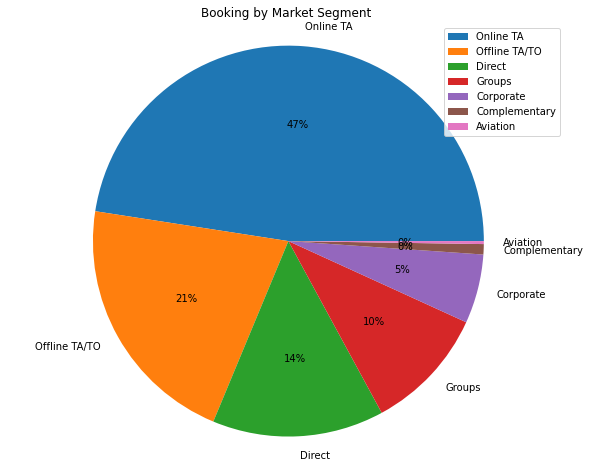

In [33]:
plt.figure(figsize=(10,8))
plt.pie(sizes, autopct = '%1d%%', labels = labels)
plt.axis('equal')
plt.title('Booking by Market Segment')
plt.legend()
plt.show()

**6. How long do guests stay at the hotels?**

In [34]:
total_stay= pd.read_sql('''WITH total_nights_CTE AS(
                                SELECT *, (stays_in_weekend_nights + stays_in_week_nights) AS total_nights
                                FROM hotel_booking
                                WHERE is_canceled = 0)
                                    SELECT DISTINCT total_nights
                                    ,COUNT(CASE WHEN hotel = 'Resort Hotel' THEN hotel END) AS total_nights_resort
                                    ,COUNT(CASE WHEN hotel = 'City Hotel' THEN hotel END) AS total_nights_city
                                    FROM total_nights_CTE
                                    GROUP BY total_nights
                                    ORDER BY total_nights''', df_conn)
                              
total_stay.head()

,total_nights,total_nights_resort,total_nights_city
0,0,371,251
1,1,6579,9155
2,2,4488,10983
3,3,3828,11889
4,4,3321,7694


In [35]:
label_night = list(total_stay.total_nights.values)
resort_nights= list(total_stay.total_nights_resort.values)
city_nights=list(total_stay.total_nights_city.values)

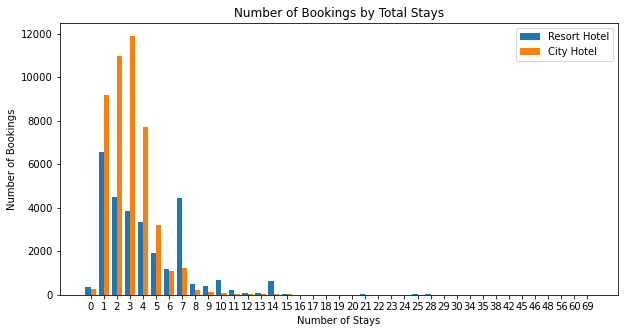

In [63]:
plt.figure(figsize=(10,5))
X_axis = np.arange(len(label_night))
  
plt.bar(X_axis - 0.2, resort_nights, 0.4, label = 'Resort Hotel') #side-by-side-chart
plt.bar(X_axis + 0.2, city_nights, 0.4, label = 'City Hotel')
  
plt.xticks(X_axis, label_night)
plt.xlabel("Number of Stays")
plt.ylabel("Number of Bookings")
plt.title("Number of Bookings by Total Stays")
plt.legend()
plt.show()